In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image  
from sklearn import tree
from os import system

In [2]:
bankData = pd.read_csv('bank-full.csv')
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
bankData.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
print(bankData['job'].value_counts())
print()
print(bankData['marital'].value_counts())
print()
print(bankData['education'].value_counts())
print()
print(bankData['default'].value_counts())
print()
print(bankData['housing'].value_counts())
print()
print(bankData['loan'].value_counts())
print()
print(bankData['contact'].value_counts())
print()
print(bankData['month'].value_counts())
print()
print(bankData['poutcome'].value_counts())
print()
print(bankData['Target'].value_counts())
print()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

yes    25130
no     20081
Name: housing, dtype: int64

no     37967
yes     7244
Name: loan, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype:

In [7]:
replaceStruct = {
    "job": {
        "admin.": 1,
        "blue-collar": 2,
        "entrepreneur": 3,
        "housemaid": 4,
        "management": 5,
        "retired": 6,
        "self-employed": 7,
        "services": 8,
        "technician": 9,
        "unemployed": 10,
        "unknown": -1,
        "student": 11
    },
    "marital": {"single": 1, "married": 2 , "divorced": 3},
    "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": -1},
    "default": {"no": 1, "yes":2},
    "housing": {"no": 1, "yes":2},
    "loan": {"no": 1, "yes": 2 },
    "contact": {"cellular": 1, "telephone": 2, "unknown": -1},
    "month": {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    },
    "poutcome": {"failure": 1, "other": 2, "success": 3, "unknown": -1},
    "Target": {"no": 0, "yes": 1 }
}

In [8]:
bankData=bankData.replace(replaceStruct)
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,5,2,3,1,2143,2,1,-1,5,5,261,1,-1,0,-1,0
1,44,9,1,2,1,29,2,1,-1,5,5,151,1,-1,0,-1,0
2,33,3,2,2,1,2,2,2,-1,5,5,76,1,-1,0,-1,0
3,47,2,2,-1,1,1506,2,1,-1,5,5,92,1,-1,0,-1,0
4,33,-1,1,-1,1,1,1,1,-1,5,5,198,1,-1,0,-1,0
5,35,5,2,3,1,231,2,1,-1,5,5,139,1,-1,0,-1,0
6,28,5,1,3,1,447,2,2,-1,5,5,217,1,-1,0,-1,0
7,42,3,3,3,2,2,2,1,-1,5,5,380,1,-1,0,-1,0
8,58,6,2,1,1,121,2,1,-1,5,5,50,1,-1,0,-1,0
9,43,9,1,2,1,593,2,1,-1,5,5,55,1,-1,0,-1,0


In [9]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


In [10]:
bankData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,5.101590,3.052568,-1.0,2.0,5.0,8.0,11.0
marital,45211.0,1.832275,0.608230,1.0,1.0,2.0,2.0,3.0
education,45211.0,2.019442,0.902795,-1.0,2.0,2.0,3.0,3.0
default,45211.0,1.018027,0.133049,1.0,1.0,1.0,1.0,2.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,1.555838,0.496878,1.0,1.0,2.0,2.0,2.0
loan,45211.0,1.160226,0.366820,1.0,1.0,1.0,1.0,2.0
contact,45211.0,0.488310,0.976936,-1.0,-1.0,1.0,1.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


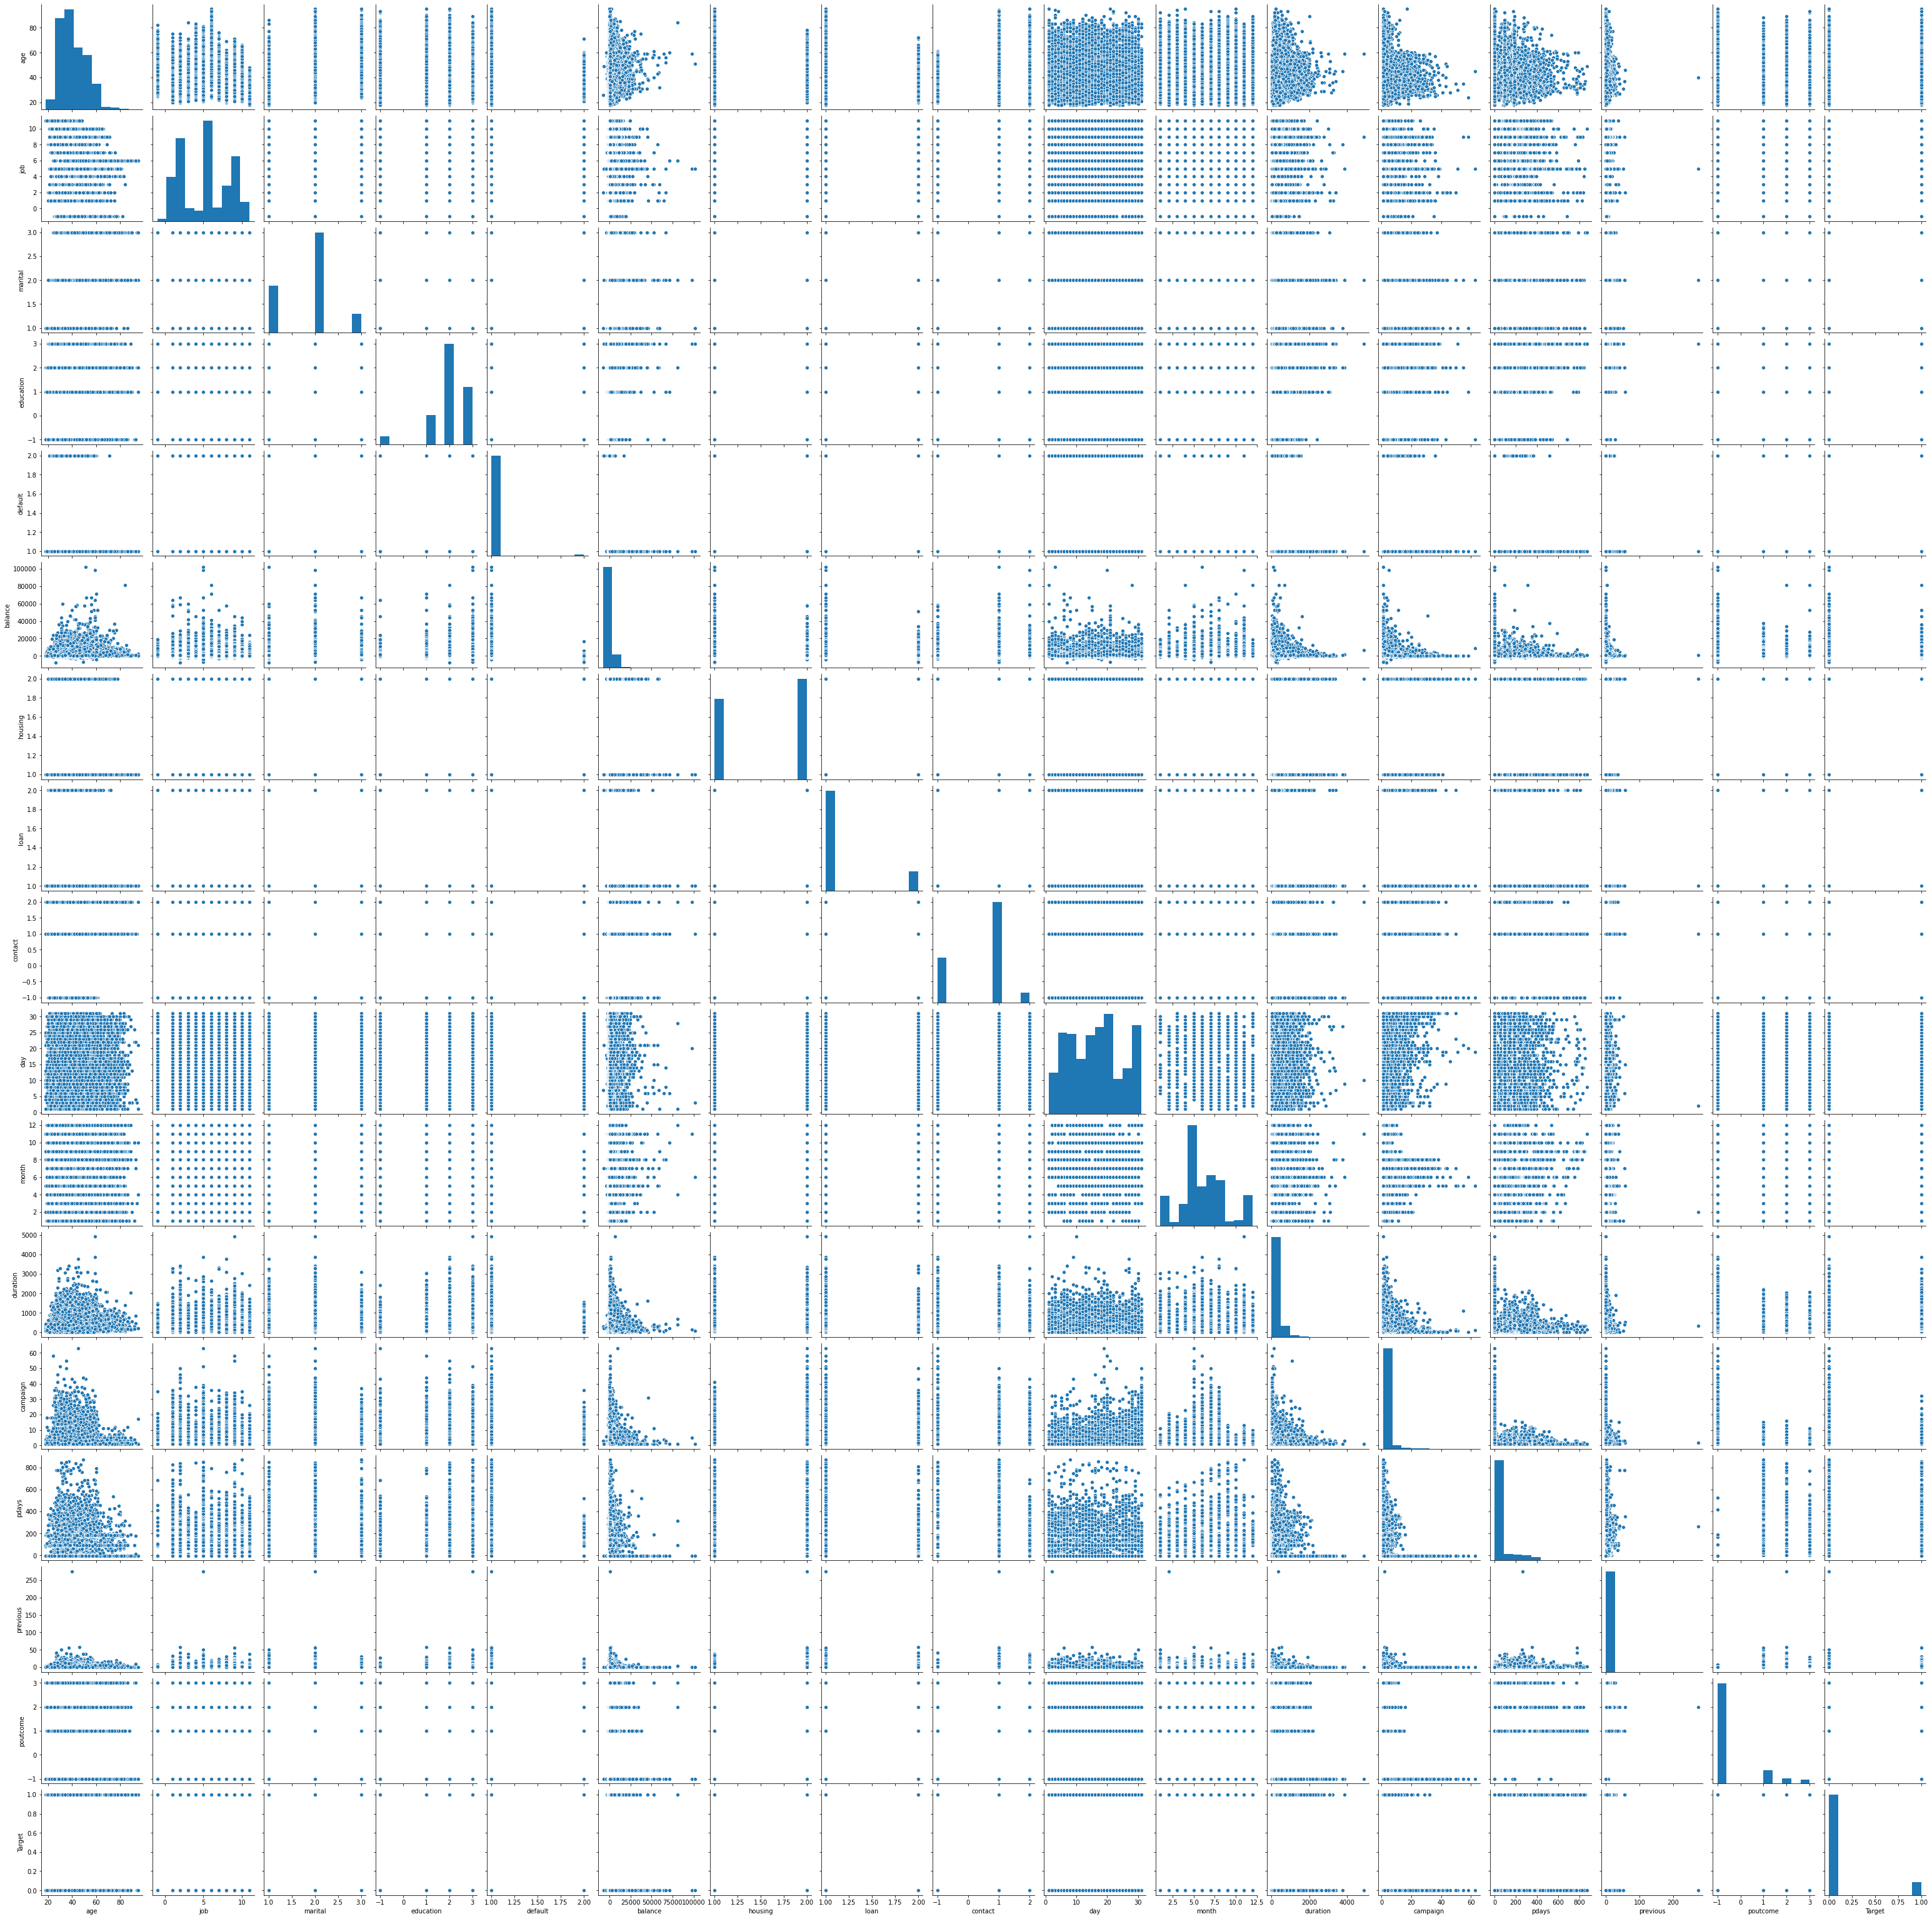

In [11]:
sns.pairplot(bankData[0:])

#### We see a relationship with age and pdays, campaign and duration with clients under 60 years old
#### We see a strong relationship of pdays, campaign with duration bellow 2000
#### We see a strong relationship between low balance and pdays, campaign and duration

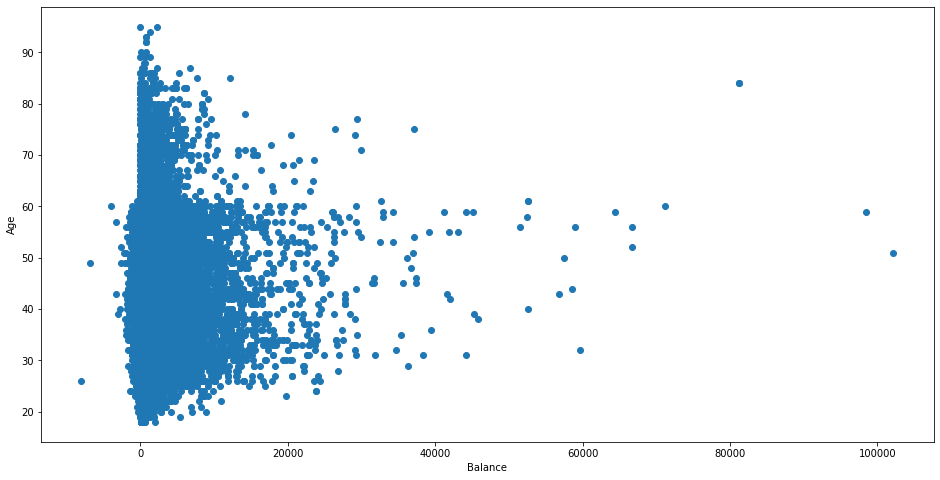

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(bankData['balance'], bankData['age'])
ax.set_xlabel('Balance')
ax.set_ylabel('Age')
plt.show()

#### Verifying several relations with balance we can assume that balances over 50,000 are outliers we need to remove

In [13]:
bankData.drop(bankData[bankData['balance'] > 50000].index, inplace = True) 

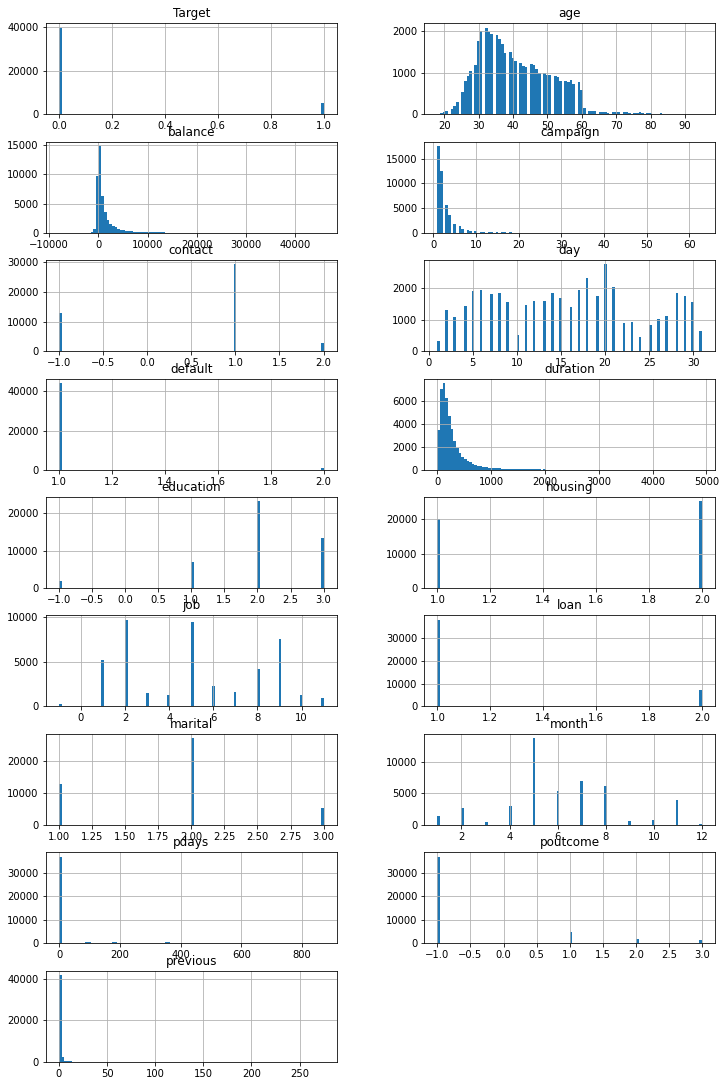

In [14]:
bankData.hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 

In [15]:
bankData.skew()

age           0.683830
job           0.140829
marital       0.102890
education    -1.378022
default       7.243851
balance       5.364079
housing      -0.225488
loan          1.852195
contact      -0.687014
day           0.092878
month         0.242943
duration      3.144290
campaign      4.898880
pdays         2.615681
previous     41.841397
poutcome      2.069096
Target        2.384112
dtype: float64

In [16]:
bankData.describe().transpose()
uniqueValues = bankData.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
age            77
job            12
marital         3
education       4
default         2
balance      7152
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [17]:
bankData.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.050514,0.403259,-0.165181,-0.017815,0.094470,-0.185106,-0.015508,0.061028,-0.008860,0.092655,-0.004837,0.004923,-0.023993,0.001218,0.007913,0.024566
job,-0.050514,1.000000,-0.078092,0.149447,-0.006595,0.021814,-0.112864,-0.029881,0.082403,0.023038,0.038902,0.006571,-0.001023,-0.016608,0.004851,0.018279,0.050282
marital,0.403259,-0.078092,1.000000,-0.080474,0.007040,-0.004318,0.016201,0.046937,-0.025858,0.005267,0.050931,-0.011956,0.008981,-0.019239,-0.014981,-0.029884,-0.045875
education,-0.165181,0.149447,-0.080474,1.000000,-0.007518,0.044562,-0.022873,0.014662,0.092860,0.018633,0.061963,0.002284,-0.001107,0.007611,0.023641,0.035269,0.041528
default,-0.017815,-0.006595,0.007040,-0.007518,1.000000,-0.072815,-0.006075,0.077226,-0.022781,0.009395,0.015023,-0.010023,0.016820,-0.029988,-0.018336,-0.039614,-0.022409
balance,0.094470,0.021814,-0.004318,0.044562,-0.072815,1.000000,-0.067713,-0.090646,0.044217,0.010442,0.099161,0.024126,-0.015341,0.004250,0.019288,0.038086,0.055495
housing,-0.185106,-0.112864,0.016201,-0.022873,-0.006075,-0.067713,1.000000,0.041248,-0.213362,-0.028236,-0.173795,0.005078,-0.023629,0.124227,0.037061,0.023124,-0.139077
loan,-0.015508,-0.029881,0.046937,0.014662,0.077226,-0.090646,0.041248,1.000000,0.003416,0.011329,0.021723,-0.012433,0.010005,-0.022748,-0.011048,-0.043006,-0.068137
contact,0.061028,0.082403,-0.025858,0.092860,-0.022781,0.044217,-0.213362,0.003416,1.000000,0.037605,0.178458,0.007432,0.009015,0.233047,0.149966,0.262332,0.143304
day,-0.008860,0.023038,0.005267,0.018633,0.009395,0.010442,-0.028236,0.011329,0.037605,1.000000,0.102003,-0.030307,0.162418,-0.093234,-0.051758,-0.079812,-0.028373


In [18]:
def plot_corr(df, size=17):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

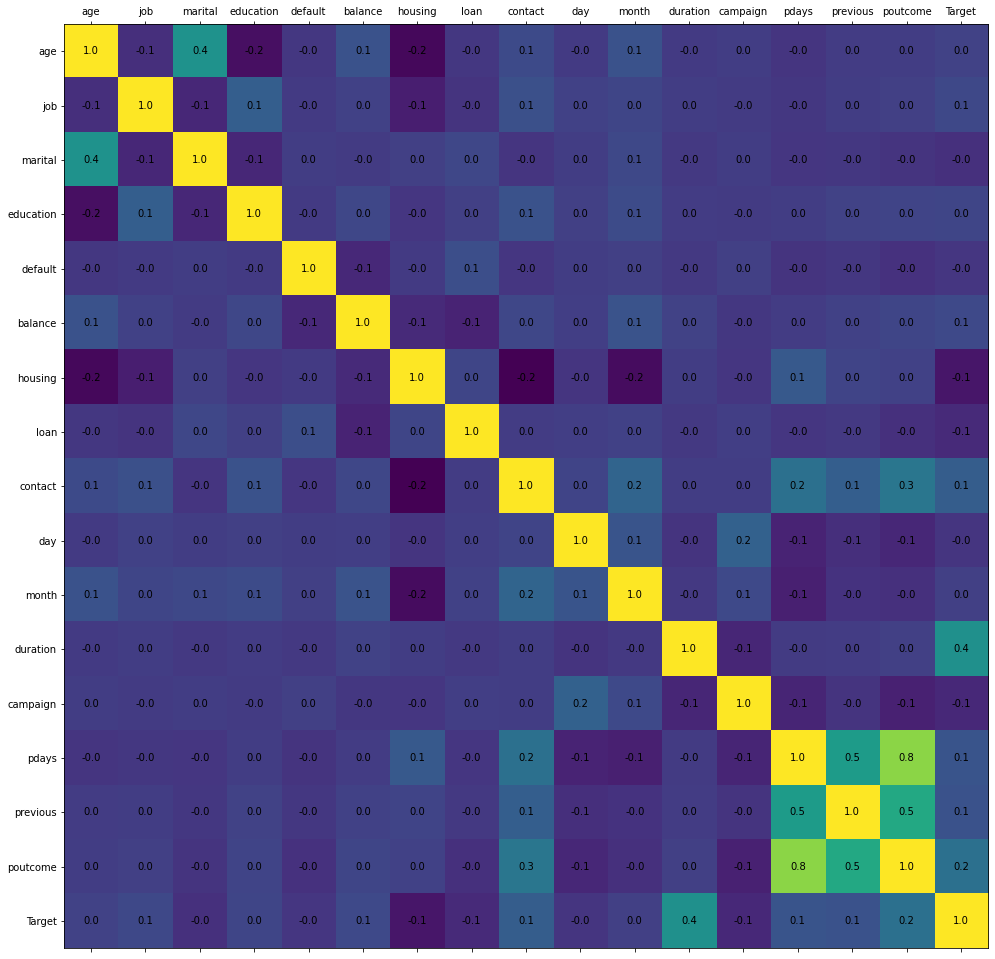

In [19]:
plot_corr(bankData)

#### There a high relationship between the number of days 
#### the client was last contacted, number of contacts performed 
#### before this campaign for this client and the outcome of a previous campaign
#### Theres a relationship between the duration of a campaign and if the client subscribed a term deposit

In [20]:
X = bankData.drop("Target", axis=1)
y = bankData.pop("Target")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [22]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
# Predict on test
y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.000832  0.017032 -0.176519  0.077967 -0.341257  0.000013 -0.933028   

          7         8         9       10       11        12        13  \
0 -0.635956  0.454089 -0.005014 -0.02118  0.00404 -0.121786 -0.002887   

         14        15  intercept  
0 -0.017242  0.682977  -0.391431  


In [23]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8975512612479717


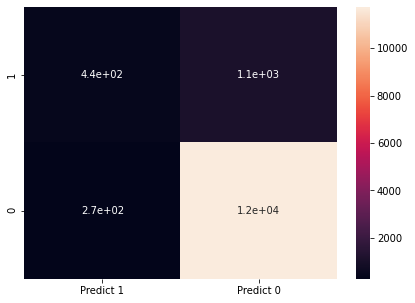

In [24]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [25]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [26]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.87380144564095


In [27]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9015647226173542
0.9007228204749963


0.9007228204749963


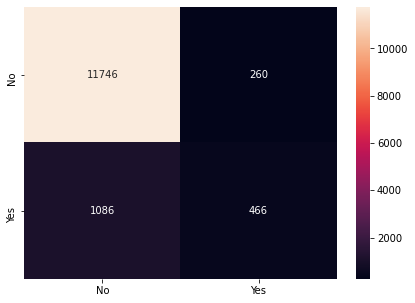

In [28]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [29]:
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

0.9059595810591533


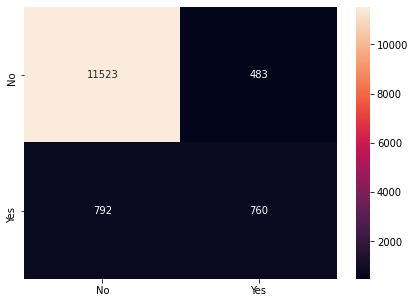

In [30]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [31]:
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

0.8915769287505532


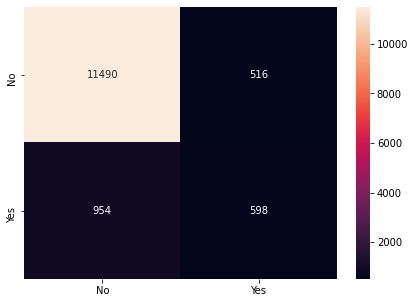

In [32]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [33]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

0.9021979643015194


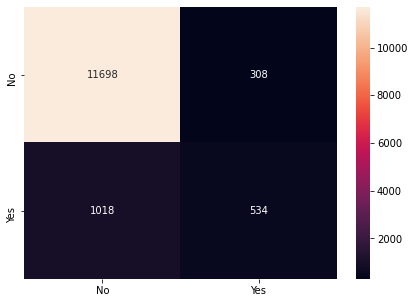

In [34]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [35]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9059595810591533


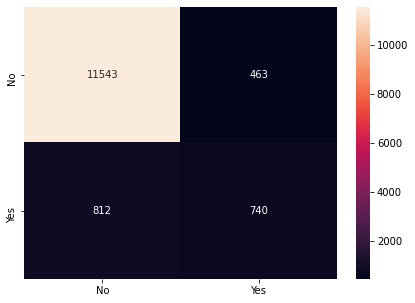

In [36]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### The bagging classifier and the Random forest seem to be the best models for the prediction of a client subscribed a term deposiut